In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
df2022_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220604.txt')
df2022_2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220611.txt')
df2022_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220618.txt')
df2022_4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220625.txt')
df2022_5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_220702.txt')

df2019_1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190601.txt')
df2019_2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190608.txt')
df2019_3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190615.txt')
df2019_4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190622.txt')
df2019_5 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt')

df2022 = pd.concat([df2022_1 ,df2022_2, df2022_3, df2022_4, df2022_5], ignore_index=True)
df2019 = pd.concat([df2019_1 ,df2019_2, df2019_3, df2019_4, df2019_5], ignore_index=True)

In [324]:
df2019.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


In [325]:
df2022.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,00:00:00,REGULAR,7717669,2709039
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,04:00:00,REGULAR,7717677,2709047
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,08:00:00,REGULAR,7717692,2709080
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,12:00:00,REGULAR,7717724,2709155
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,16:00:00,REGULAR,7717838,2709208


In [326]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027180 entries, 0 to 1027179
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1027180 non-null  object
 1   UNIT                                                                  1027180 non-null  object
 2   SCP                                                                   1027180 non-null  object
 3   STATION                                                               1027180 non-null  object
 4   LINENAME                                                              1027180 non-null  object
 5   DIVISION                                                              1027180 non-null  object
 6   DATE                                                                  1027180 non-

In [327]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057684 entries, 0 to 1057683
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   1057684 non-null  object
 1   UNIT                                                                  1057684 non-null  object
 2   SCP                                                                   1057684 non-null  object
 3   STATION                                                               1057684 non-null  object
 4   LINENAME                                                              1057684 non-null  object
 5   DIVISION                                                              1057684 non-null  object
 6   DATE                                                                  1057684 non-

In [328]:
df2019.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [329]:
df2019.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [330]:
df2019.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [331]:
df2022.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

In [332]:
df2022.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [333]:
df2019['DATETIME'] = df2019["DATE"] + " " + df2019["TIME"]
df2022['DATETIME'] = df2022["DATE"] + " " + df2022["TIME"]

In [334]:
df2019

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,05/25/2019 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,05/25/2019 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,05/25/2019 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,05/25/2019 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,05/25/2019 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1027175,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,REGULAR,5554,379,06/28/2019 05:00:00
1027176,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,REGULAR,5554,379,06/28/2019 09:00:00
1027177,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,REGULAR,5554,379,06/28/2019 13:00:00
1027178,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,REGULAR,5554,379,06/28/2019 17:00:00


In [335]:
df2022

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,00:00:00,REGULAR,7717669,2709039,05/28/2022 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,04:00:00,REGULAR,7717677,2709047,05/28/2022 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,08:00:00,REGULAR,7717692,2709080,05/28/2022 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,12:00:00,REGULAR,7717724,2709155,05/28/2022 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2022,16:00:00,REGULAR,7717838,2709208,05/28/2022 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1057679,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,05:00:00,REGULAR,0,643,07/01/2022 05:00:00
1057680,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,09:00:00,REGULAR,0,643,07/01/2022 09:00:00
1057681,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,13:00:00,REGULAR,0,646,07/01/2022 13:00:00
1057682,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/01/2022,17:00:00,REGULAR,0,647,07/01/2022 17:00:00


In [336]:
df2019.drop(columns=['DATE', 'TIME', 'DESC', 'LINENAME', 'DIVISION'], inplace=True)
df2022.drop(columns=['DATE', 'TIME', 'DESC', 'LINENAME', 'DIVISION'], inplace=True)

In [337]:
df2019

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,7071830,2396411,05/25/2019 00:00:00
1,A002,R051,02-00-00,59 ST,7071844,2396415,05/25/2019 04:00:00
2,A002,R051,02-00-00,59 ST,7071864,2396443,05/25/2019 08:00:00
3,A002,R051,02-00-00,59 ST,7071943,2396500,05/25/2019 12:00:00
4,A002,R051,02-00-00,59 ST,7072182,2396555,05/25/2019 16:00:00
...,...,...,...,...,...,...,...
1027175,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,379,06/28/2019 05:00:00
1027176,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,379,06/28/2019 09:00:00
1027177,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,379,06/28/2019 13:00:00
1027178,TRAM2,R469,00-05-01,RIT-ROOSEVELT,5554,379,06/28/2019 17:00:00


In [338]:
df2022

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,7717669,2709039,05/28/2022 00:00:00
1,A002,R051,02-00-00,59 ST,7717677,2709047,05/28/2022 04:00:00
2,A002,R051,02-00-00,59 ST,7717692,2709080,05/28/2022 08:00:00
3,A002,R051,02-00-00,59 ST,7717724,2709155,05/28/2022 12:00:00
4,A002,R051,02-00-00,59 ST,7717838,2709208,05/28/2022 16:00:00
...,...,...,...,...,...,...,...
1057679,TRAM2,R469,00-05-01,RIT-ROOSEVELT,0,643,07/01/2022 05:00:00
1057680,TRAM2,R469,00-05-01,RIT-ROOSEVELT,0,643,07/01/2022 09:00:00
1057681,TRAM2,R469,00-05-01,RIT-ROOSEVELT,0,646,07/01/2022 13:00:00
1057682,TRAM2,R469,00-05-01,RIT-ROOSEVELT,0,647,07/01/2022 17:00:00


In [339]:
df2019['TURNSTILE'] = df2019['C/A'] + df2019['UNIT'] + df2019['SCP']
df2022['TURNSTILE'] = df2019['C/A'] + df2019['UNIT'] + df2019['SCP']

In [340]:
df2019.drop(columns=['C/A', 'UNIT', 'SCP'], inplace=True)
df2022.drop(columns=['C/A', 'UNIT', 'SCP'], inplace=True)

In [341]:
df2019

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE
0,59 ST,7071830,2396411,05/25/2019 00:00:00,A002R05102-00-00
1,59 ST,7071844,2396415,05/25/2019 04:00:00,A002R05102-00-00
2,59 ST,7071864,2396443,05/25/2019 08:00:00,A002R05102-00-00
3,59 ST,7071943,2396500,05/25/2019 12:00:00,A002R05102-00-00
4,59 ST,7072182,2396555,05/25/2019 16:00:00,A002R05102-00-00
...,...,...,...,...,...
1027175,RIT-ROOSEVELT,5554,379,06/28/2019 05:00:00,TRAM2R46900-05-01
1027176,RIT-ROOSEVELT,5554,379,06/28/2019 09:00:00,TRAM2R46900-05-01
1027177,RIT-ROOSEVELT,5554,379,06/28/2019 13:00:00,TRAM2R46900-05-01
1027178,RIT-ROOSEVELT,5554,379,06/28/2019 17:00:00,TRAM2R46900-05-01


In [342]:
df2022

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE
0,59 ST,7717669,2709039,05/28/2022 00:00:00,A002R05102-00-00
1,59 ST,7717677,2709047,05/28/2022 04:00:00,A002R05102-00-00
2,59 ST,7717692,2709080,05/28/2022 08:00:00,A002R05102-00-00
3,59 ST,7717724,2709155,05/28/2022 12:00:00,A002R05102-00-00
4,59 ST,7717838,2709208,05/28/2022 16:00:00,A002R05102-00-00
...,...,...,...,...,...
1057679,RIT-ROOSEVELT,0,643,07/01/2022 05:00:00,NaN
1057680,RIT-ROOSEVELT,0,643,07/01/2022 09:00:00,NaN
1057681,RIT-ROOSEVELT,0,646,07/01/2022 13:00:00,NaN
1057682,RIT-ROOSEVELT,0,647,07/01/2022 17:00:00,NaN


In [343]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027180 entries, 0 to 1027179
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   STATION    1027180 non-null  object
 1   ENTRIES    1027180 non-null  int64 
 2   EXITS      1027180 non-null  int64 
 3   DATETIME   1027180 non-null  object
 4   TURNSTILE  1027180 non-null  object
dtypes: int64(2), object(3)
memory usage: 39.2+ MB


In [344]:
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057684 entries, 0 to 1057683
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   STATION    1057684 non-null  object
 1   ENTRIES    1057684 non-null  int64 
 2   EXITS      1057684 non-null  int64 
 3   DATETIME   1057684 non-null  object
 4   TURNSTILE  1027180 non-null  object
dtypes: int64(2), object(3)
memory usage: 40.3+ MB


In [345]:
df2019['TURNSTILE'].value_counts()

R229R14301-00-00     271
R229R14301-00-01     270
R229R14301-00-04     270
R229R14301-00-02     270
R229R14301-00-03     269
                    ... 
PTH18R54901-01-08      1
PTH04R55100-01-08      1
PTH19R54902-02-08      1
PTH22R54000-06-01      1
PTH10R54700-00-08      1
Name: TURNSTILE, Length: 4892, dtype: int64

In [346]:
df2022['TURNSTILE'].value_counts()

R229R14301-00-00     271
R229R14301-00-01     270
R229R14301-00-04     270
R229R14301-00-02     270
R229R14301-00-03     269
                    ... 
PTH18R54901-01-08      1
PTH04R55100-01-08      1
PTH19R54902-02-08      1
PTH22R54000-06-01      1
PTH10R54700-00-08      1
Name: TURNSTILE, Length: 4892, dtype: int64

In [347]:
exits_diff2019 = df2019['EXITS'].diff()
entries_diff2019 = df2019['ENTRIES'].diff()
exits_diff2019 = pd.DataFrame(exits_diff2019)
entries_diff2019 = pd.DataFrame(entries_diff2019)
exits_diff2022 = df2022['EXITS'].diff()
entries_diff2022 = df2022['ENTRIES'].diff()
exits_diff2022 = pd.DataFrame(exits_diff2022)
entries_diff2022 = pd.DataFrame(entries_diff2022)

In [348]:
df2019['EXITS_DIFF'] = exits_diff2019
df2019['ENTRIES_DIFF'] = entries_diff2019
df2022['EXITS_DIFF'] = exits_diff2022
df2022['ENTRIES_DIFF'] = entries_diff2022

In [349]:
df2019

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
0,59 ST,7071830,2396411,05/25/2019 00:00:00,A002R05102-00-00,NaN,NaN
1,59 ST,7071844,2396415,05/25/2019 04:00:00,A002R05102-00-00,4.0,14.0
2,59 ST,7071864,2396443,05/25/2019 08:00:00,A002R05102-00-00,28.0,20.0
3,59 ST,7071943,2396500,05/25/2019 12:00:00,A002R05102-00-00,57.0,79.0
4,59 ST,7072182,2396555,05/25/2019 16:00:00,A002R05102-00-00,55.0,239.0
...,...,...,...,...,...,...,...
1027175,RIT-ROOSEVELT,5554,379,06/28/2019 05:00:00,TRAM2R46900-05-01,0.0,0.0
1027176,RIT-ROOSEVELT,5554,379,06/28/2019 09:00:00,TRAM2R46900-05-01,0.0,0.0
1027177,RIT-ROOSEVELT,5554,379,06/28/2019 13:00:00,TRAM2R46900-05-01,0.0,0.0
1027178,RIT-ROOSEVELT,5554,379,06/28/2019 17:00:00,TRAM2R46900-05-01,0.0,0.0


In [350]:
df2022

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
0,59 ST,7717669,2709039,05/28/2022 00:00:00,A002R05102-00-00,NaN,NaN
1,59 ST,7717677,2709047,05/28/2022 04:00:00,A002R05102-00-00,8.0,8.0
2,59 ST,7717692,2709080,05/28/2022 08:00:00,A002R05102-00-00,33.0,15.0
3,59 ST,7717724,2709155,05/28/2022 12:00:00,A002R05102-00-00,75.0,32.0
4,59 ST,7717838,2709208,05/28/2022 16:00:00,A002R05102-00-00,53.0,114.0
...,...,...,...,...,...,...,...
1057679,RIT-ROOSEVELT,0,643,07/01/2022 05:00:00,NaN,0.0,0.0
1057680,RIT-ROOSEVELT,0,643,07/01/2022 09:00:00,NaN,0.0,0.0
1057681,RIT-ROOSEVELT,0,646,07/01/2022 13:00:00,NaN,3.0,0.0
1057682,RIT-ROOSEVELT,0,647,07/01/2022 17:00:00,NaN,1.0,0.0


In [351]:
df2019 = df2019.loc[df2019.EXITS_DIFF > 0]
df2022 = df2022.loc[df2022.EXITS_DIFF > 0]

In [352]:
df2019

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
1,59 ST,7071844,2396415,05/25/2019 04:00:00,A002R05102-00-00,4.0,14.0
2,59 ST,7071864,2396443,05/25/2019 08:00:00,A002R05102-00-00,28.0,20.0
3,59 ST,7071943,2396500,05/25/2019 12:00:00,A002R05102-00-00,57.0,79.0
4,59 ST,7072182,2396555,05/25/2019 16:00:00,A002R05102-00-00,55.0,239.0
5,59 ST,7072456,2396593,05/25/2019 20:00:00,A002R05102-00-00,38.0,274.0
...,...,...,...,...,...,...,...
1027090,RIT-ROOSEVELT,3060306,392420,06/28/2019 01:00:00,TRAM2R46900-03-01,2.0,26.0
1027093,RIT-ROOSEVELT,3060401,392425,06/28/2019 13:00:00,TRAM2R46900-03-01,5.0,81.0
1027094,RIT-ROOSEVELT,3060536,392432,06/28/2019 17:00:00,TRAM2R46900-03-01,7.0,135.0
1027095,RIT-ROOSEVELT,3060669,392436,06/28/2019 21:00:00,TRAM2R46900-03-01,4.0,133.0


In [353]:
df2022

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
1,59 ST,7717677,2709047,05/28/2022 04:00:00,A002R05102-00-00,8.0,8.0
2,59 ST,7717692,2709080,05/28/2022 08:00:00,A002R05102-00-00,33.0,15.0
3,59 ST,7717724,2709155,05/28/2022 12:00:00,A002R05102-00-00,75.0,32.0
4,59 ST,7717838,2709208,05/28/2022 16:00:00,A002R05102-00-00,53.0,114.0
5,59 ST,7717947,2709229,05/28/2022 20:00:00,A002R05102-00-00,21.0,109.0
...,...,...,...,...,...,...,...
1057675,RIT-ROOSEVELT,0,640,06/30/2022 13:00:00,NaN,1.0,0.0
1057677,RIT-ROOSEVELT,0,643,06/30/2022 21:00:00,NaN,3.0,0.0
1057681,RIT-ROOSEVELT,0,646,07/01/2022 13:00:00,NaN,3.0,0.0
1057682,RIT-ROOSEVELT,0,647,07/01/2022 17:00:00,NaN,1.0,0.0


In [354]:
df2019 = df2019.loc[df2019.ENTRIES_DIFF > 0]
df2022 = df2022.loc[df2022.ENTRIES_DIFF > 0]

In [355]:
df2019

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
1,59 ST,7071844,2396415,05/25/2019 04:00:00,A002R05102-00-00,4.0,14.0
2,59 ST,7071864,2396443,05/25/2019 08:00:00,A002R05102-00-00,28.0,20.0
3,59 ST,7071943,2396500,05/25/2019 12:00:00,A002R05102-00-00,57.0,79.0
4,59 ST,7072182,2396555,05/25/2019 16:00:00,A002R05102-00-00,55.0,239.0
5,59 ST,7072456,2396593,05/25/2019 20:00:00,A002R05102-00-00,38.0,274.0
...,...,...,...,...,...,...,...
1027090,RIT-ROOSEVELT,3060306,392420,06/28/2019 01:00:00,TRAM2R46900-03-01,2.0,26.0
1027093,RIT-ROOSEVELT,3060401,392425,06/28/2019 13:00:00,TRAM2R46900-03-01,5.0,81.0
1027094,RIT-ROOSEVELT,3060536,392432,06/28/2019 17:00:00,TRAM2R46900-03-01,7.0,135.0
1027095,RIT-ROOSEVELT,3060669,392436,06/28/2019 21:00:00,TRAM2R46900-03-01,4.0,133.0


In [356]:
df2022

,STATION,ENTRIES,EXITS,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
1,59 ST,7717677,2709047,05/28/2022 04:00:00,A002R05102-00-00,8.0,8.0
2,59 ST,7717692,2709080,05/28/2022 08:00:00,A002R05102-00-00,33.0,15.0
3,59 ST,7717724,2709155,05/28/2022 12:00:00,A002R05102-00-00,75.0,32.0
4,59 ST,7717838,2709208,05/28/2022 16:00:00,A002R05102-00-00,53.0,114.0
5,59 ST,7717947,2709229,05/28/2022 20:00:00,A002R05102-00-00,21.0,109.0
...,...,...,...,...,...,...,...
1057591,RIT-ROOSEVELT,3211282,402584,06/30/2022 21:00:00,NaN,3.0,9.0
1057592,RIT-ROOSEVELT,3211287,402586,07/01/2022 01:00:00,NaN,2.0,5.0
1057594,RIT-ROOSEVELT,3211288,402588,07/01/2022 09:00:00,NaN,2.0,1.0
1057595,RIT-ROOSEVELT,3211309,402589,07/01/2022 13:00:00,NaN,1.0,21.0


In [357]:
df2019.drop(columns=['ENTRIES', 'EXITS'], inplace=True)
df2022.drop(columns=['ENTRIES', 'EXITS'], inplace=True)

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2481845673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019.drop(columns=['ENTRIES', 'EXITS'], inplace=True)
/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2481845673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022.drop(columns=['ENTRIES', 'EXITS'], inplace=True)


In [358]:
df2019

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
1,59 ST,05/25/2019 04:00:00,A002R05102-00-00,4.0,14.0
2,59 ST,05/25/2019 08:00:00,A002R05102-00-00,28.0,20.0
3,59 ST,05/25/2019 12:00:00,A002R05102-00-00,57.0,79.0
4,59 ST,05/25/2019 16:00:00,A002R05102-00-00,55.0,239.0
5,59 ST,05/25/2019 20:00:00,A002R05102-00-00,38.0,274.0
...,...,...,...,...,...
1027090,RIT-ROOSEVELT,06/28/2019 01:00:00,TRAM2R46900-03-01,2.0,26.0
1027093,RIT-ROOSEVELT,06/28/2019 13:00:00,TRAM2R46900-03-01,5.0,81.0
1027094,RIT-ROOSEVELT,06/28/2019 17:00:00,TRAM2R46900-03-01,7.0,135.0
1027095,RIT-ROOSEVELT,06/28/2019 21:00:00,TRAM2R46900-03-01,4.0,133.0


In [359]:
df2022

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF
1,59 ST,05/28/2022 04:00:00,A002R05102-00-00,8.0,8.0
2,59 ST,05/28/2022 08:00:00,A002R05102-00-00,33.0,15.0
3,59 ST,05/28/2022 12:00:00,A002R05102-00-00,75.0,32.0
4,59 ST,05/28/2022 16:00:00,A002R05102-00-00,53.0,114.0
5,59 ST,05/28/2022 20:00:00,A002R05102-00-00,21.0,109.0
...,...,...,...,...,...
1057591,RIT-ROOSEVELT,06/30/2022 21:00:00,NaN,3.0,9.0
1057592,RIT-ROOSEVELT,07/01/2022 01:00:00,NaN,2.0,5.0
1057594,RIT-ROOSEVELT,07/01/2022 09:00:00,NaN,2.0,1.0
1057595,RIT-ROOSEVELT,07/01/2022 13:00:00,NaN,1.0,21.0


In [360]:
df2019['TOTAL_TRAFFIC'] = df2019['EXITS_DIFF'] + df2019['ENTRIES_DIFF']
df2022['TOTAL_TRAFFIC'] = df2022['EXITS_DIFF'] + df2022['ENTRIES_DIFF']

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2818188500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019['TOTAL_TRAFFIC'] = df2019['EXITS_DIFF'] + df2019['ENTRIES_DIFF']
/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2818188500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022['TOTAL_TRAFFIC'] = df2022['EXITS_DIFF'] + df2022['ENTRIES_DIFF']


In [361]:
df2019

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
1,59 ST,05/25/2019 04:00:00,A002R05102-00-00,4.0,14.0,18.0
2,59 ST,05/25/2019 08:00:00,A002R05102-00-00,28.0,20.0,48.0
3,59 ST,05/25/2019 12:00:00,A002R05102-00-00,57.0,79.0,136.0
4,59 ST,05/25/2019 16:00:00,A002R05102-00-00,55.0,239.0,294.0
5,59 ST,05/25/2019 20:00:00,A002R05102-00-00,38.0,274.0,312.0
...,...,...,...,...,...,...
1027090,RIT-ROOSEVELT,06/28/2019 01:00:00,TRAM2R46900-03-01,2.0,26.0,28.0
1027093,RIT-ROOSEVELT,06/28/2019 13:00:00,TRAM2R46900-03-01,5.0,81.0,86.0
1027094,RIT-ROOSEVELT,06/28/2019 17:00:00,TRAM2R46900-03-01,7.0,135.0,142.0
1027095,RIT-ROOSEVELT,06/28/2019 21:00:00,TRAM2R46900-03-01,4.0,133.0,137.0


In [362]:
df2022

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
1,59 ST,05/28/2022 04:00:00,A002R05102-00-00,8.0,8.0,16.0
2,59 ST,05/28/2022 08:00:00,A002R05102-00-00,33.0,15.0,48.0
3,59 ST,05/28/2022 12:00:00,A002R05102-00-00,75.0,32.0,107.0
4,59 ST,05/28/2022 16:00:00,A002R05102-00-00,53.0,114.0,167.0
5,59 ST,05/28/2022 20:00:00,A002R05102-00-00,21.0,109.0,130.0
...,...,...,...,...,...,...
1057591,RIT-ROOSEVELT,06/30/2022 21:00:00,NaN,3.0,9.0,12.0
1057592,RIT-ROOSEVELT,07/01/2022 01:00:00,NaN,2.0,5.0,7.0
1057594,RIT-ROOSEVELT,07/01/2022 09:00:00,NaN,2.0,1.0,3.0
1057595,RIT-ROOSEVELT,07/01/2022 13:00:00,NaN,1.0,21.0,22.0


In [363]:
df2019 = df2019.loc[df2019.EXITS_DIFF < 7200]
df2022 = df2022.loc[df2022.EXITS_DIFF < 7200]

In [364]:
df2019 = df2019.loc[df2019.ENTRIES_DIFF < 7200]
df2022 = df2022.loc[df2022.ENTRIES_DIFF < 7200]

In [365]:
df2019.STATION.value_counts()

34 ST-PENN STA     18844
FULTON ST          15480
23 ST              12489
GRD CNTRL-42 ST    11607
86 ST              11551
                   ...  
190 ST               396
225 ST               390
CLEVELAND ST         378
ST. GEORGE            60
ORCHARD BEACH         52
Name: STATION, Length: 377, dtype: int64

In [366]:
df2022.STATION.value_counts()

34 ST-PENN STA     18046
GRD CNTRL-42 ST    15128
FULTON ST          14488
23 ST              12531
86 ST              11185
                   ...  
CLEVELAND ST         410
190 ST               398
182-183 STS          388
ST. GEORGE             5
ORCHARD BEACH          5
Name: STATION, Length: 377, dtype: int64

In [367]:
df2019.groupby(['STATION'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False)

STATION
34 ST-PENN STA     9526570.0
GRD CNTRL-42 ST    8132622.0
34 ST-HERALD SQ    6844085.0
TIMES SQ-42 ST     5903536.0
14 ST-UNION SQ     5737786.0
                     ...    
BEACH 98 ST          40945.0
BEACH 105 ST         24328.0
BROAD CHANNEL        11074.0
ST. GEORGE            3991.0
ORCHARD BEACH         2479.0
Name: TOTAL_TRAFFIC, Length: 377, dtype: float64

In [368]:
df2022.groupby(['STATION'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False)

STATION
34 ST-PENN STA     4498864.0
GRD CNTRL-42 ST    3711296.0
34 ST-HERALD SQ    3366884.0
TIMES SQ-42 ST     2987058.0
14 ST-UNION SQ     2847974.0
                     ...    
AQUEDUCT RACETR      21896.0
BEACH 105 ST         14214.0
BROAD CHANNEL         6406.0
ST. GEORGE             292.0
ORCHARD BEACH           31.0
Name: TOTAL_TRAFFIC, Length: 377, dtype: float64

In [395]:
df2019_34_stpennsta = df2019.loc[df2019.STATION == '34 ST-PENN STA']
df2022_34_stpennsta = df2022.loc[df2022.STATION == '34 ST-PENN STA']

In [396]:
df2019_GRD = df2019.loc[df2019.STATION == 'GRD CNTRL-42 ST']
df2022_GRD = df2022.loc[df2022.STATION == 'GRD CNTRL-42 ST']

In [397]:
df2019_34_stpennsta

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
52523,34 ST-PENN STA,05/25/2019 04:00:00,N067R01200-00-00,11.0,5.0,16.0
52524,34 ST-PENN STA,05/25/2019 08:00:00,N067R01200-00-00,75.0,9.0,84.0
52525,34 ST-PENN STA,05/25/2019 12:00:00,N067R01200-00-00,173.0,74.0,247.0
52526,34 ST-PENN STA,05/25/2019 16:00:00,N067R01200-00-00,231.0,124.0,355.0
52527,34 ST-PENN STA,05/25/2019 20:00:00,N067R01200-00-00,189.0,72.0,261.0
...,...,...,...,...,...,...
958927,34 ST-PENN STA,06/28/2019 08:01:27,R142R29301-06-01,91.0,18.0,109.0
958928,34 ST-PENN STA,06/28/2019 10:00:00,R142R29301-06-01,275.0,74.0,349.0
958929,34 ST-PENN STA,06/28/2019 14:00:00,R142R29301-06-01,315.0,180.0,495.0
958930,34 ST-PENN STA,06/28/2019 18:00:00,R142R29301-06-01,360.0,220.0,580.0


In [398]:
df2022_34_stpennsta

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
55736,34 ST-PENN STA,05/28/2022 04:00:00,N078R17501-03-02,7.0,4.0,11.0
55737,34 ST-PENN STA,05/28/2022 08:00:00,N078R17501-03-02,39.0,15.0,54.0
55738,34 ST-PENN STA,05/28/2022 12:00:00,N078R17501-03-02,102.0,36.0,138.0
55739,34 ST-PENN STA,05/28/2022 16:00:00,N078R17501-03-02,169.0,79.0,248.0
55740,34 ST-PENN STA,05/28/2022 20:00:00,N078R17501-03-02,115.0,43.0,158.0
...,...,...,...,...,...,...
987295,34 ST-PENN STA,07/01/2022 06:00:00,R253R18100-00-00,21.0,2.0,23.0
987296,34 ST-PENN STA,07/01/2022 10:00:00,R253R18100-00-00,166.0,39.0,205.0
987297,34 ST-PENN STA,07/01/2022 14:00:00,R253R18100-00-00,163.0,101.0,264.0
987298,34 ST-PENN STA,07/01/2022 18:00:00,R253R18100-00-00,212.0,66.0,278.0


In [399]:
df2019_GRD

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
156446,GRD CNTRL-42 ST,05/25/2019 05:00:00,R236R04500-00-00,2.0,1.0,3.0
156447,GRD CNTRL-42 ST,05/25/2019 09:00:00,R236R04500-00-00,145.0,26.0,171.0
156448,GRD CNTRL-42 ST,05/25/2019 13:00:00,R236R04500-00-00,399.0,84.0,483.0
156449,GRD CNTRL-42 ST,05/25/2019 17:00:00,R236R04500-00-00,397.0,155.0,552.0
156450,GRD CNTRL-42 ST,05/25/2019 21:00:00,R236R04500-00-00,327.0,114.0,441.0
...,...,...,...,...,...,...
982236,GRD CNTRL-42 ST,06/28/2019 01:00:00,R241AR04800-00-04,1.0,21.0,22.0
982238,GRD CNTRL-42 ST,06/28/2019 09:00:00,R241AR04800-00-04,4.0,54.0,58.0
982239,GRD CNTRL-42 ST,06/28/2019 13:00:00,R241AR04800-00-04,6.0,74.0,80.0
982240,GRD CNTRL-42 ST,06/28/2019 17:00:00,R241AR04800-00-04,4.0,316.0,320.0


In [400]:
df2022_GRD

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
161243,GRD CNTRL-42 ST,05/30/2022 13:00:00,R245R05100-05-00,6.0,2.0,8.0
161245,GRD CNTRL-42 ST,05/30/2022 21:00:00,R245R05100-05-00,3.0,1.0,4.0
161251,GRD CNTRL-42 ST,05/31/2022 21:00:00,R245R05100-05-00,5.0,1.0,6.0
161257,GRD CNTRL-42 ST,06/01/2022 21:00:00,R245R05100-05-00,11.0,3.0,14.0
161262,GRD CNTRL-42 ST,06/02/2022 17:00:00,R245R05100-05-00,8.0,1.0,9.0
...,...,...,...,...,...,...
1011786,GRD CNTRL-42 ST,07/01/2022 01:00:00,R532R32800-06-02,7.0,2.0,9.0
1011788,GRD CNTRL-42 ST,07/01/2022 09:00:00,R532R32800-06-02,1.0,4.0,5.0
1011789,GRD CNTRL-42 ST,07/01/2022 13:00:00,R532R32800-06-02,4.0,4.0,8.0
1011790,GRD CNTRL-42 ST,07/01/2022 17:00:00,R532R32800-06-02,13.0,25.0,38.0


In [427]:
df2022_GRD.columns

Index(['STATION', 'DATETIME', 'TURNSTILE', 'EXITS_DIFF', 'ENTRIES_DIFF',
       'TOTAL_TRAFFIC'],
      dtype='object')

In [401]:
final_df2019_34_stpennsta = pd.DataFrame(df2019_34_stpennsta.groupby(['DATETIME'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).iloc[0:11])
final_df2019_34_stpennsta

,TOTAL_TRAFFIC
DATETIME,
05/30/2019 20:00:00,88956.0
05/29/2019 20:00:00,88919.0
06/18/2019 20:00:00,84953.0
06/19/2019 20:00:00,84676.0
06/27/2019 20:00:00,83750.0
06/06/2019 20:00:00,83324.0
06/12/2019 20:00:00,82617.0
06/11/2019 20:00:00,82592.0
06/20/2019 20:00:00,81968.0


In [402]:
final_df2022_34_stpennsta = pd.DataFrame(df2022_34_stpennsta.groupby(['DATETIME'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).iloc[0:11])
final_df2022_34_stpennsta

,TOTAL_TRAFFIC
DATETIME,
06/23/2022 20:00:00,39748.0
06/01/2022 20:00:00,39446.0
06/21/2022 20:00:00,39399.0
06/28/2022 20:00:00,38897.0
06/14/2022 20:00:00,38611.0
06/16/2022 20:00:00,38563.0
06/22/2022 20:00:00,38506.0
06/07/2022 20:00:00,38398.0
06/09/2022 20:00:00,38329.0


In [403]:
final_df2019_GRD = pd.DataFrame(df2019_GRD.groupby(['DATETIME'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).iloc[0:11])
final_df2019_GRD

,TOTAL_TRAFFIC
DATETIME,
06/18/2019 21:00:00,61051.0
05/30/2019 21:00:00,59732.0
05/29/2019 21:00:00,59691.0
06/10/2019 21:00:00,54330.0
06/19/2019 21:00:00,53449.0
06/20/2019 21:00:00,53411.0
05/29/2019 20:00:00,52613.0
06/18/2019 20:00:00,52531.0
06/17/2019 21:00:00,51176.0


In [404]:
final_df2022_GRD = pd.DataFrame(df2022_GRD.groupby(['DATETIME'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).iloc[0:11])
final_df2022_GRD


,TOTAL_TRAFFIC
DATETIME,
06/01/2022 20:00:00,22743.0
06/15/2022 20:00:00,22733.0
06/22/2022 20:00:00,22571.0
06/29/2022 20:00:00,22527.0
06/15/2022 12:00:00,22501.0
06/21/2022 20:00:00,22400.0
06/14/2022 20:00:00,22299.0
06/08/2022 20:00:00,21898.0
06/07/2022 20:00:00,21881.0


Text(0.5, 1.0, '34 PENN STATION 2019 TRAFFIC')

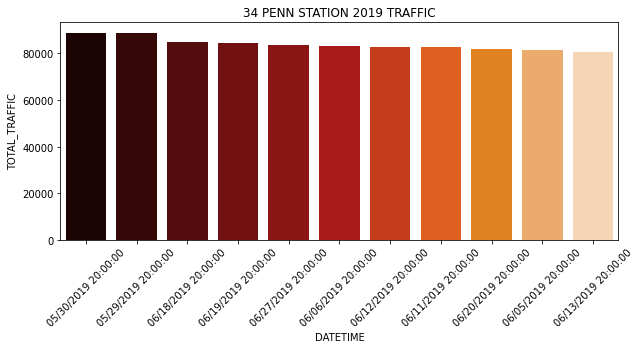

In [405]:
plt.figure(figsize=[10,4])
sns.barplot(x=final_df2019_34_stpennsta.index, y=final_df2019_34_stpennsta.TOTAL_TRAFFIC, data=final_df2019_34_stpennsta, palette='gist_heat')
plt.xticks(rotation=45)
plt.title('34 PENN STATION 2019 TRAFFIC')

Text(0.5, 1.0, '34 PENN STATION 2022 TRAFFIC')

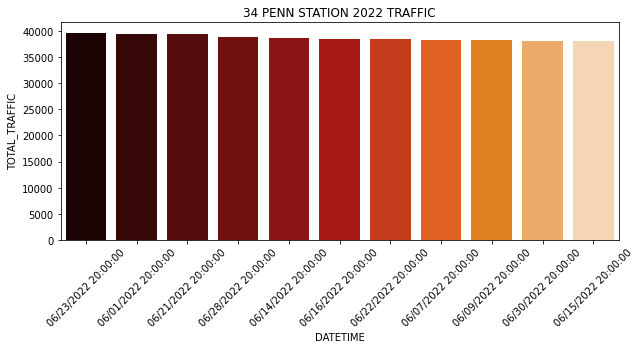

In [380]:
plt.figure(figsize=[10,4])
sns.barplot(x=final_df2022_34_stpennsta.index, y=final_df2022_34_stpennsta.TOTAL_TRAFFIC, data=final_df2022_34_stpennsta, palette='gist_heat')
plt.xticks(rotation=45)
plt.title('34 PENN STATION 2022 TRAFFIC')

Text(0.5, 1.0, 'GRD CNTRL-42 STATION 2022 TRAFFIC')

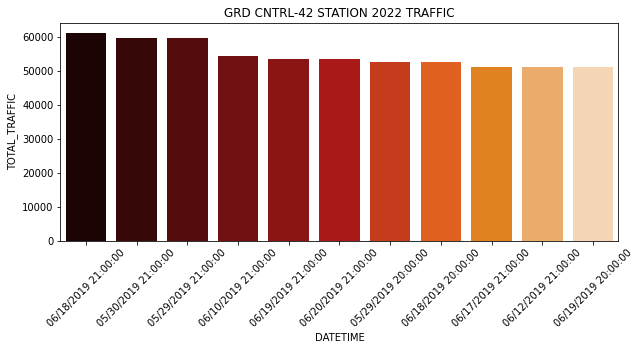

In [381]:
plt.figure(figsize=[10,4])
sns.barplot(x=final_df2019_GRD.index, y=final_df2019_GRD.TOTAL_TRAFFIC, data=final_df2019_GRD, palette='gist_heat')
plt.xticks(rotation=45)
plt.title('GRD CNTRL-42 STATION 2022 TRAFFIC')


Text(0.5, 1.0, 'GRD CNTRL-42 STATION 2022 TRAFFIC')

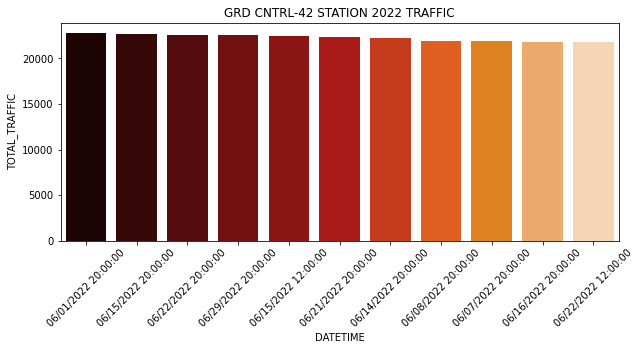

In [382]:
plt.figure(figsize=[10,4])
sns.barplot(x=final_df2022_GRD.index, y=final_df2022_GRD.TOTAL_TRAFFIC, data=final_df2022_GRD, palette='gist_heat')
plt.xticks(rotation=45)
plt.title('GRD CNTRL-42 STATION 2022 TRAFFIC')

In [421]:
df2019_34_stpennsta['DATETIME'] = pd.to_datetime(df2019_34_stpennsta['DATETIME'])
df2022_34_stpennsta['DATETIME'] = pd.to_datetime(df2022_34_stpennsta['DATETIME'])

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2158927134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019_34_stpennsta['DATETIME'] = pd.to_datetime(df2019_34_stpennsta['DATETIME'])
/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2158927134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_34_stpennsta['DATETIME'] = pd.to_datetime(df2022_34_stpennsta['DATETIME'])


In [429]:
df2019_GRD['DATETIME'] = pd.to_datetime(df2019_GRD['DATETIME'])
df2022_GRD['DATETIME'] = pd.to_datetime(df2022_GRD['DATETIME'])

/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2097110849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2019_GRD['DATETIME'] = pd.to_datetime(df2019_GRD['DATETIME'])
/var/folders/pt/t0hqszgd5076m2mx3z6z7m7c0000gn/T/ipykernel_8515/2097110849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2022_GRD['DATETIME'] = pd.to_datetime(df2022_GRD['DATETIME'])


In [430]:
df2019_34_stpennsta.index = df2019_34_stpennsta['DATETIME']
df2022_34_stpennsta.index = df2022_34_stpennsta['DATETIME']

df2019_GRD.index = df2019_GRD['DATETIME']
df2022_GRD.index = df2022_GRD['DATETIME']

In [431]:
df2019_34_stpennsta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18844 entries, 2019-05-25 04:00:00 to 2019-06-28 22:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATION        18844 non-null  object        
 1   DATETIME       18844 non-null  datetime64[ns]
 2   TURNSTILE      18844 non-null  object        
 3   EXITS_DIFF     18844 non-null  float64       
 4   ENTRIES_DIFF   18844 non-null  float64       
 5   TOTAL_TRAFFIC  18844 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.0+ MB


In [432]:
df2022_34_stpennsta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18046 entries, 2022-05-28 04:00:00 to 2022-07-01 22:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATION        18046 non-null  object        
 1   DATETIME       18046 non-null  datetime64[ns]
 2   TURNSTILE      18046 non-null  object        
 3   EXITS_DIFF     18046 non-null  float64       
 4   ENTRIES_DIFF   18046 non-null  float64       
 5   TOTAL_TRAFFIC  18046 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 986.9+ KB


In [433]:
df2019_GRD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11607 entries, 2019-05-25 05:00:00 to 2019-06-28 21:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATION        11607 non-null  object        
 1   DATETIME       11607 non-null  datetime64[ns]
 2   TURNSTILE      11607 non-null  object        
 3   EXITS_DIFF     11607 non-null  float64       
 4   ENTRIES_DIFF   11607 non-null  float64       
 5   TOTAL_TRAFFIC  11607 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 634.8+ KB


In [434]:
df2022_GRD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15128 entries, 2022-05-30 13:00:00 to 2022-07-01 21:00:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   STATION        15128 non-null  object        
 1   DATETIME       15128 non-null  datetime64[ns]
 2   TURNSTILE      15128 non-null  object        
 3   EXITS_DIFF     15128 non-null  float64       
 4   ENTRIES_DIFF   15128 non-null  float64       
 5   TOTAL_TRAFFIC  15128 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 827.3+ KB


In [435]:
df2022_34_stpennsta

,STATION,DATETIME,TURNSTILE,EXITS_DIFF,ENTRIES_DIFF,TOTAL_TRAFFIC
DATETIME,,,,,,
2022-05-28 04:00:00,34 ST-PENN STA,2022-05-28 04:00:00,N078R17501-03-02,7.0,4.0,11.0
2022-05-28 08:00:00,34 ST-PENN STA,2022-05-28 08:00:00,N078R17501-03-02,39.0,15.0,54.0
2022-05-28 12:00:00,34 ST-PENN STA,2022-05-28 12:00:00,N078R17501-03-02,102.0,36.0,138.0
2022-05-28 16:00:00,34 ST-PENN STA,2022-05-28 16:00:00,N078R17501-03-02,169.0,79.0,248.0
2022-05-28 20:00:00,34 ST-PENN STA,2022-05-28 20:00:00,N078R17501-03-02,115.0,43.0,158.0
...,...,...,...,...,...,...
2022-07-01 06:00:00,34 ST-PENN STA,2022-07-01 06:00:00,R253R18100-00-00,21.0,2.0,23.0
2022-07-01 10:00:00,34 ST-PENN STA,2022-07-01 10:00:00,R253R18100-00-00,166.0,39.0,205.0
2022-07-01 14:00:00,34 ST-PENN STA,2022-07-01 14:00:00,R253R18100-00-00,163.0,101.0,264.0


In [443]:
dayly_sum_df2019_34_stpennsta = df2019_34_stpennsta.groupby(pd.Grouper(freq='D'))['TOTAL_TRAFFIC'].sum()
dayly_sum_df2019_34_stpennsta = pd.DataFrame(dayly_sum_df2019_34_stpennsta)
dayly_sum_df2019_34_stpennsta

,TOTAL_TRAFFIC
DATETIME,
2019-05-25,137015.0
2019-05-26,141928.0
2019-05-27,145565.0
2019-05-28,318131.0
2019-05-29,340764.0
2019-05-30,341818.0
2019-05-31,331003.0
2019-06-01,143959.0
2019-06-02,155173.0


In [493]:
dayly_sum_df2022_34_stpennsta = df2022_34_stpennsta.groupby(pd.Grouper(freq='D'))['TOTAL_TRAFFIC'].sum()
dayly_sum_df2022_34_stpennsta = pd.DataFrame(dayly_sum_df2022_34_stpennsta)
dayly_sum_df2022_34_stpennsta

,TOTAL_TRAFFIC
DATETIME,
2022-05-28,68746.0
2022-05-29,73222.0
2022-05-30,68898.0
2022-05-31,140481.0
2022-06-01,155836.0
2022-06-02,152697.0
2022-06-03,141830.0
2022-06-04,78408.0
2022-06-05,77281.0


In [494]:
dayly_sum_df2019_GRD = df2019_GRD.groupby(pd.Grouper(freq='D'))['TOTAL_TRAFFIC'].sum()
dayly_sum_df2019_GRD = pd.DataFrame(dayly_sum_df2019_GRD)
dayly_sum_df2019_GRD

,TOTAL_TRAFFIC
DATETIME,
2019-05-25,96080.0
2019-05-26,96169.0
2019-05-27,90431.0
2019-05-28,282923.0
2019-05-29,312761.0
2019-05-30,310176.0
2019-05-31,278018.0
2019-06-01,101375.0
2019-06-02,97657.0


In [495]:
dayly_sum_df2022_GRD = df2022_GRD.groupby(pd.Grouper(freq='D'))['TOTAL_TRAFFIC'].sum()
dayly_sum_df2022_GRD = pd.DataFrame(dayly_sum_df2022_GRD)
dayly_sum_df2022_GRD

,TOTAL_TRAFFIC
DATETIME,
2022-05-28,58071.0
2022-05-29,55077.0
2022-05-30,49739.0
2022-05-31,123899.0
2022-06-01,136551.0
2022-06-02,134283.0
2022-06-03,113091.0
2022-06-04,53503.0
2022-06-05,51728.0


Text(0.5, 1.0, '34 PENN STATION 20219 DAILY TRAFFIC')

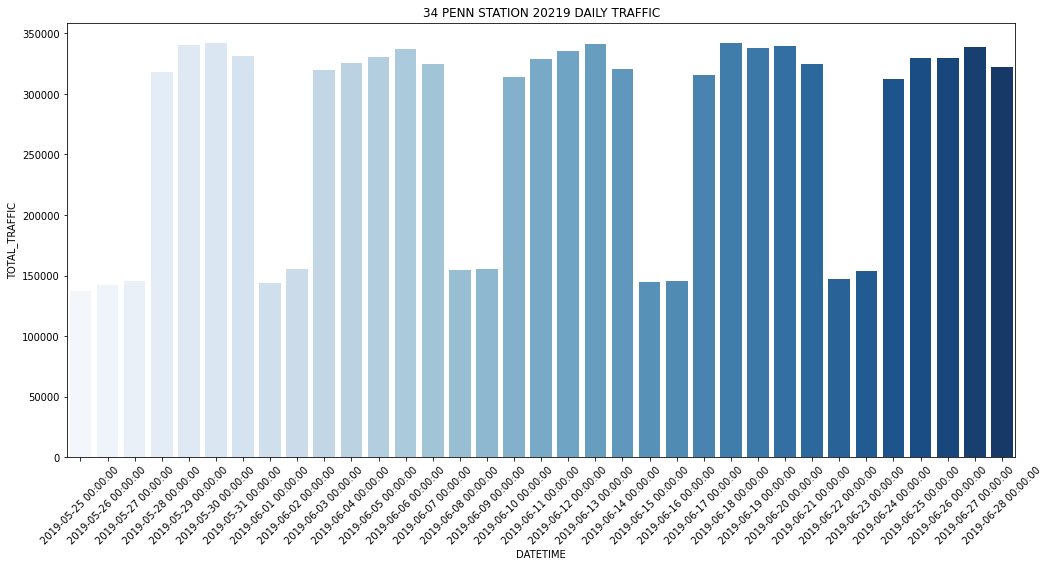

In [492]:
plt.figure(figsize=[17,8])
sns.barplot(x=dayly_sum_df2019_34_stpennsta.index, y=dayly_sum_df2019_34_stpennsta.TOTAL_TRAFFIC, data=dayly_sum_df2019_34_stpennsta, palette='Blues')
plt.xticks(rotation=45)
plt.title('34 PENN STATION 20219 DAILY TRAFFIC')

Text(0.5, 1.0, '34 PENN STATION 2022 DAILY TRAFFIC')

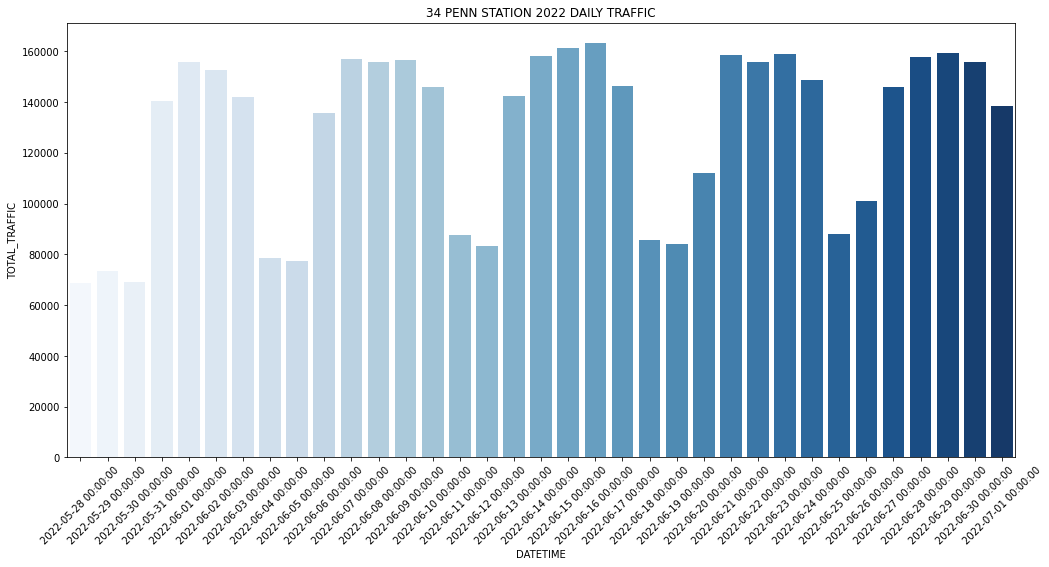

In [496]:
plt.figure(figsize=[17,8])
sns.barplot(x=dayly_sum_df2022_34_stpennsta.index, y=dayly_sum_df2022_34_stpennsta.TOTAL_TRAFFIC, data=dayly_sum_df2022_34_stpennsta, palette='Blues')
plt.xticks(rotation=45)
plt.title('34 PENN STATION 2022 DAILY TRAFFIC')

Text(0.5, 1.0, 'GRD CNTRL-42 STATION 2019 DAILY TRAFFIC')

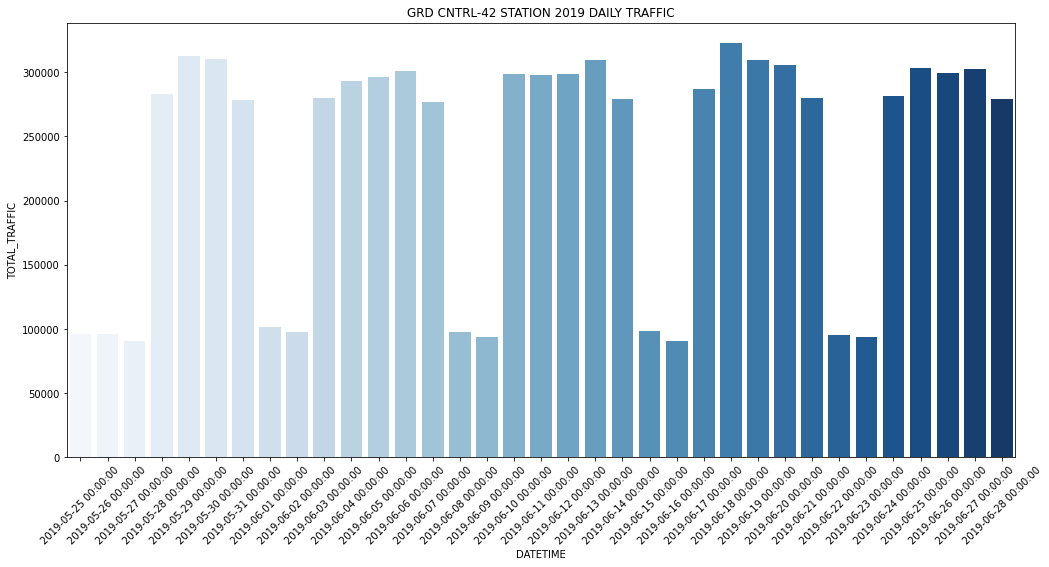

In [497]:
plt.figure(figsize=[17,8])
sns.barplot(x=dayly_sum_df2019_GRD.index, y=dayly_sum_df2019_GRD.TOTAL_TRAFFIC, data=dayly_sum_df2019_GRD, palette='Blues')
plt.xticks(rotation=45)
plt.title('GRD CNTRL-42 STATION 2019 DAILY TRAFFIC')

Text(0.5, 1.0, 'GRD CNTRL-42 STATION 2022 DAILY TRAFFIC')

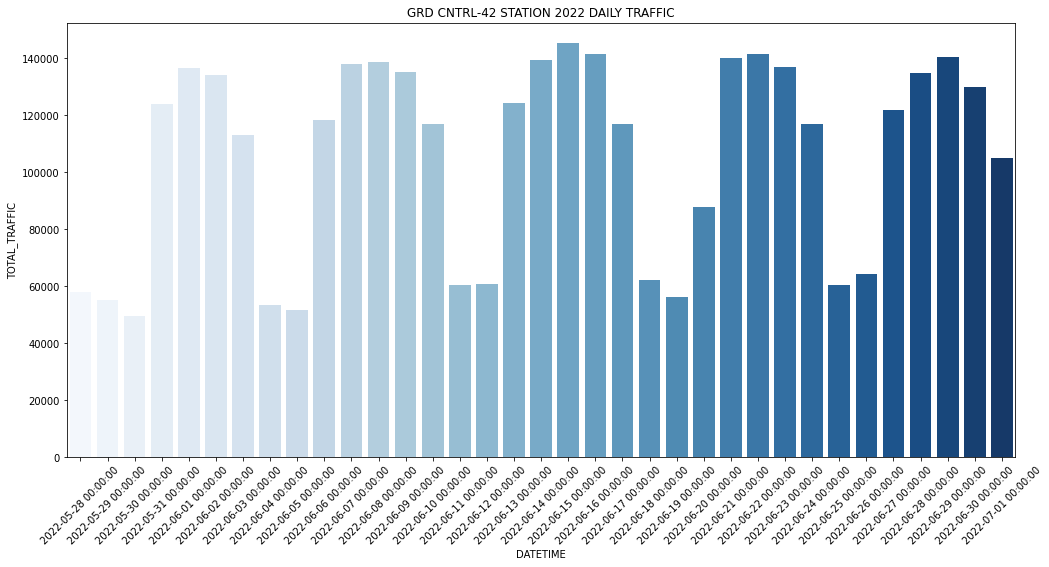

In [498]:
plt.figure(figsize=[17,8])
sns.barplot(x=dayly_sum_df2022_GRD.index, y=dayly_sum_df2022_GRD.TOTAL_TRAFFIC, data=dayly_sum_df2022_GRD, palette='Blues')
plt.xticks(rotation=45)
plt.title('GRD CNTRL-42 STATION 2022 DAILY TRAFFIC')

Text(0.5, 1.0, '2019 Traffic Difference Between Stations in June')

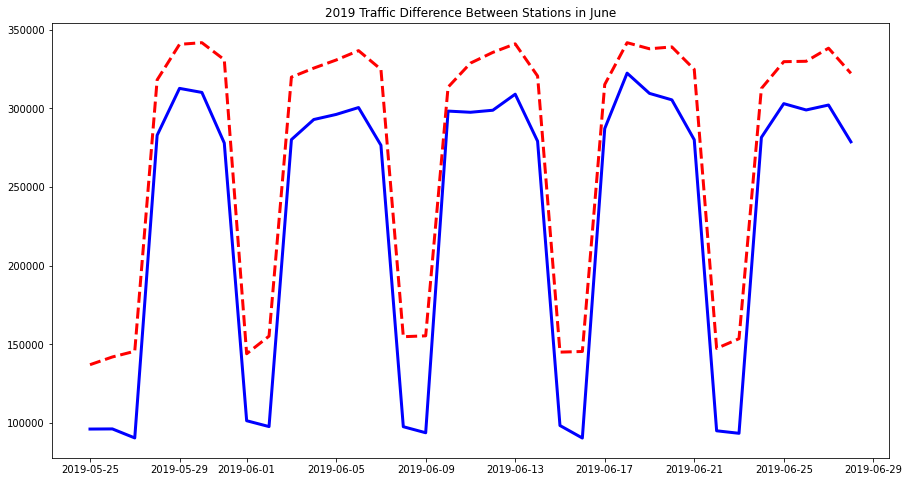

In [528]:
plt.figure(figsize= [15,8])
plt.plot(dayly_sum_df2019_GRD, linestyle= '-', linewidth= 3, color='b')
plt.plot(dayly_sum_df2019_34_stpennsta, linestyle= '--', linewidth= 3, color='r')
plt.title('2019 Traffic Difference Between Stations in June')

Text(0.5, 1.0, '2022 Traffic Difference Between Stations in June')

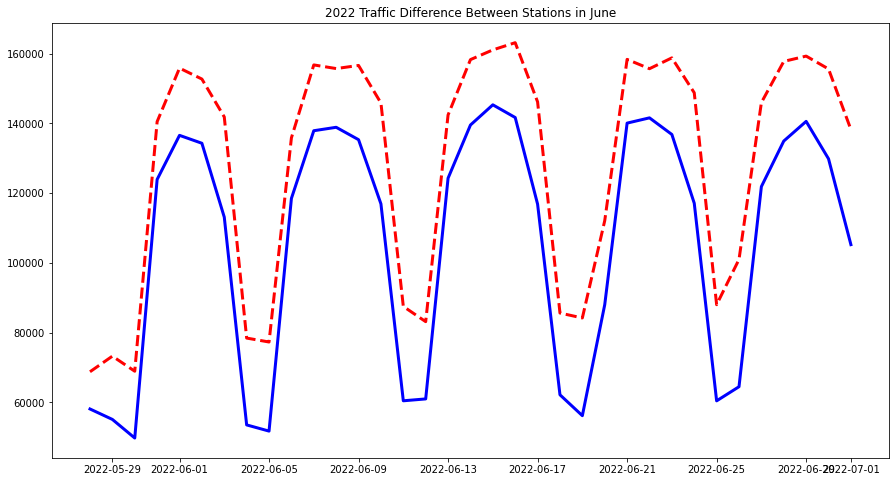

In [529]:
plt.figure(figsize= [15,8])
plt.plot(dayly_sum_df2022_GRD, linestyle= '-', linewidth= 3, color='b')
plt.plot(dayly_sum_df2022_34_stpennsta, linestyle= '--', linewidth= 3, color='r')
plt.title('2022 Traffic Difference Between Stations in June')

In [539]:
dayly_sum_df2019_34_stpennsta['TOTAL_TRAFFIC'].sort_values(ascending=False)

DATETIME
2019-05-30    341818.0
2019-06-18    341810.0
2019-06-13    341082.0
2019-05-29    340764.0
2019-06-20    339122.0
2019-06-27    338326.0
2019-06-19    337944.0
2019-06-06    336758.0
2019-06-12    335643.0
2019-05-31    331003.0
2019-06-05    330805.0
2019-06-26    329988.0
2019-06-25    329738.0
2019-06-11    328815.0
2019-06-04    325650.0
2019-06-07    324860.0
2019-06-21    324849.0
2019-06-28    322333.0
2019-06-14    320614.0
2019-06-03    319913.0
2019-05-28    318131.0
2019-06-17    315227.0
2019-06-10    313535.0
2019-06-24    312669.0
2019-06-09    155373.0
2019-06-02    155173.0
2019-06-08    154821.0
2019-06-23    153538.0
2019-06-22    147381.0
2019-05-27    145565.0
2019-06-16    145415.0
2019-06-15    145005.0
2019-06-01    143959.0
2019-05-26    141928.0
2019-05-25    137015.0
Name: TOTAL_TRAFFIC, dtype: float64

In [540]:
dayly_sum_df2022_34_stpennsta['TOTAL_TRAFFIC'].sort_values(ascending=False)

DATETIME
2022-06-16    163128.0
2022-06-15    161061.0
2022-06-29    159281.0
2022-06-23    158777.0
2022-06-21    158342.0
2022-06-14    158271.0
2022-06-28    157759.0
2022-06-07    156751.0
2022-06-09    156600.0
2022-06-01    155836.0
2022-06-08    155706.0
2022-06-22    155668.0
2022-06-30    155590.0
2022-06-02    152697.0
2022-06-24    148764.0
2022-06-17    146159.0
2022-06-27    145946.0
2022-06-10    145821.0
2022-06-13    142398.0
2022-06-03    141830.0
2022-05-31    140481.0
2022-07-01    138220.0
2022-06-06    135835.0
2022-06-20    112070.0
2022-06-26    100965.0
2022-06-25     87985.0
2022-06-11     87487.0
2022-06-18     85590.0
2022-06-19     84176.0
2022-06-12     83115.0
2022-06-04     78408.0
2022-06-05     77281.0
2022-05-29     73222.0
2022-05-30     68898.0
2022-05-28     68746.0
Name: TOTAL_TRAFFIC, dtype: float64

In [538]:
dayly_sum_df2019_GRD['TOTAL_TRAFFIC'].sort_values(ascending=False)

DATETIME
2019-06-18    322447.0
2019-05-29    312761.0
2019-05-30    310176.0
2019-06-19    309569.0
2019-06-13    309058.0
2019-06-20    305458.0
2019-06-25    303048.0
2019-06-27    302165.0
2019-06-06    300566.0
2019-06-26    299021.0
2019-06-12    298853.0
2019-06-10    298312.0
2019-06-11    297563.0
2019-06-05    296187.0
2019-06-04    292952.0
2019-06-17    287188.0
2019-05-28    282923.0
2019-06-24    281555.0
2019-06-03    280166.0
2019-06-21    280077.0
2019-06-14    279152.0
2019-06-28    278755.0
2019-05-31    278018.0
2019-06-07    276593.0
2019-06-01    101375.0
2019-06-15     98327.0
2019-06-02     97657.0
2019-06-08     97571.0
2019-05-26     96169.0
2019-05-25     96080.0
2019-06-22     94972.0
2019-06-09     93727.0
2019-06-23     93380.0
2019-05-27     90431.0
2019-06-16     90370.0
Name: TOTAL_TRAFFIC, dtype: float64

In [541]:
dayly_sum_df2022_GRD['TOTAL_TRAFFIC'].sort_values(ascending=False)

DATETIME
2022-06-15    145309.0
2022-06-16    141664.0
2022-06-22    141569.0
2022-06-29    140560.0
2022-06-21    140060.0
2022-06-14    139512.0
2022-06-08    138863.0
2022-06-07    137879.0
2022-06-23    136805.0
2022-06-01    136551.0
2022-06-09    135308.0
2022-06-28    134915.0
2022-06-02    134283.0
2022-06-30    129824.0
2022-06-13    124267.0
2022-05-31    123899.0
2022-06-27    121851.0
2022-06-06    118465.0
2022-06-24    117085.0
2022-06-10    116891.0
2022-06-17    116823.0
2022-06-03    113091.0
2022-07-01    105203.0
2022-06-20     87976.0
2022-06-26     64459.0
2022-06-18     62139.0
2022-06-12     60956.0
2022-06-11     60420.0
2022-06-25     60403.0
2022-05-28     58071.0
2022-06-19     56148.0
2022-05-29     55077.0
2022-06-04     53503.0
2022-06-05     51728.0
2022-05-30     49739.0
Name: TOTAL_TRAFFIC, dtype: float64